In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Stock_data=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']
dataframes=[]


In [ ]:
for i in Stock_data:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0)
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    temp.drop(["Volume","Open","High","Low"],axis=1,inplace=True)
    dataframes.append(temp)

In [ ]:
df=dataframes[0]
#df["Outcome"] = df["Close"].sub(df["Open"]).apply(lambda x: "Positive" if x < 0 else "Negative")
df

,Close
Date,
2012-11-28,12.36
2012-11-29,12.56
2012-11-30,12.60
2012-12-03,12.52
2012-12-04,12.62
...,...
2022-11-18,94.14
2022-11-21,92.46
2022-11-22,93.20


# SVM Regreesion Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

graphdata=[]


def SupportVectorReg(df):

    test=30
    # df['Lag_1'] = df['Close'].shift(1)
    # df['Lag_2'] = df['Close'].shift(2)
    # df['Lag_3'] = df['Close'].shift(3)
    # df['Lag_4'] = df['Close'].shift(4)
    # df['Lag_5'] = df['Close'].shift(5)
    # df['Lag_6'] = df['Close'].shift(6)
    df['Lag_7'] = df['Close'].shift(7)
    
    df.dropna(inplace=True)
    # X=df.drop("Close", axis=1)
    # Y=df["Close"]

    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

    X_train=np.array(df.iloc[:-test,1: ])
    X_test=np.array(df.iloc[-test:,1:])
    Y_train=df.iloc[:-test,0 ]
    Y_test=df.iloc[-test:,0 ] 

    model = SVR(kernel='linear')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    
    # one-step forecast
    step=np.array(Y_test[-1:].values[::-1])
    forecast=model.predict(pd.DataFrame(step).T)

    graphdata.append([Y_test,y_pred])
    mae = mean_absolute_error(Y_test, y_pred)
    mse= mean_squared_error(Y_test, y_pred)
    rmse= r2_score(Y_test, y_pred)

    return [mae,mse,rmse,forecast[0]]

In [ ]:
metricsdata=[]
for i in dataframes:
    metricsdata.append(SupportVectorReg(i))

# Visualizations

# Actual vs predicted Values

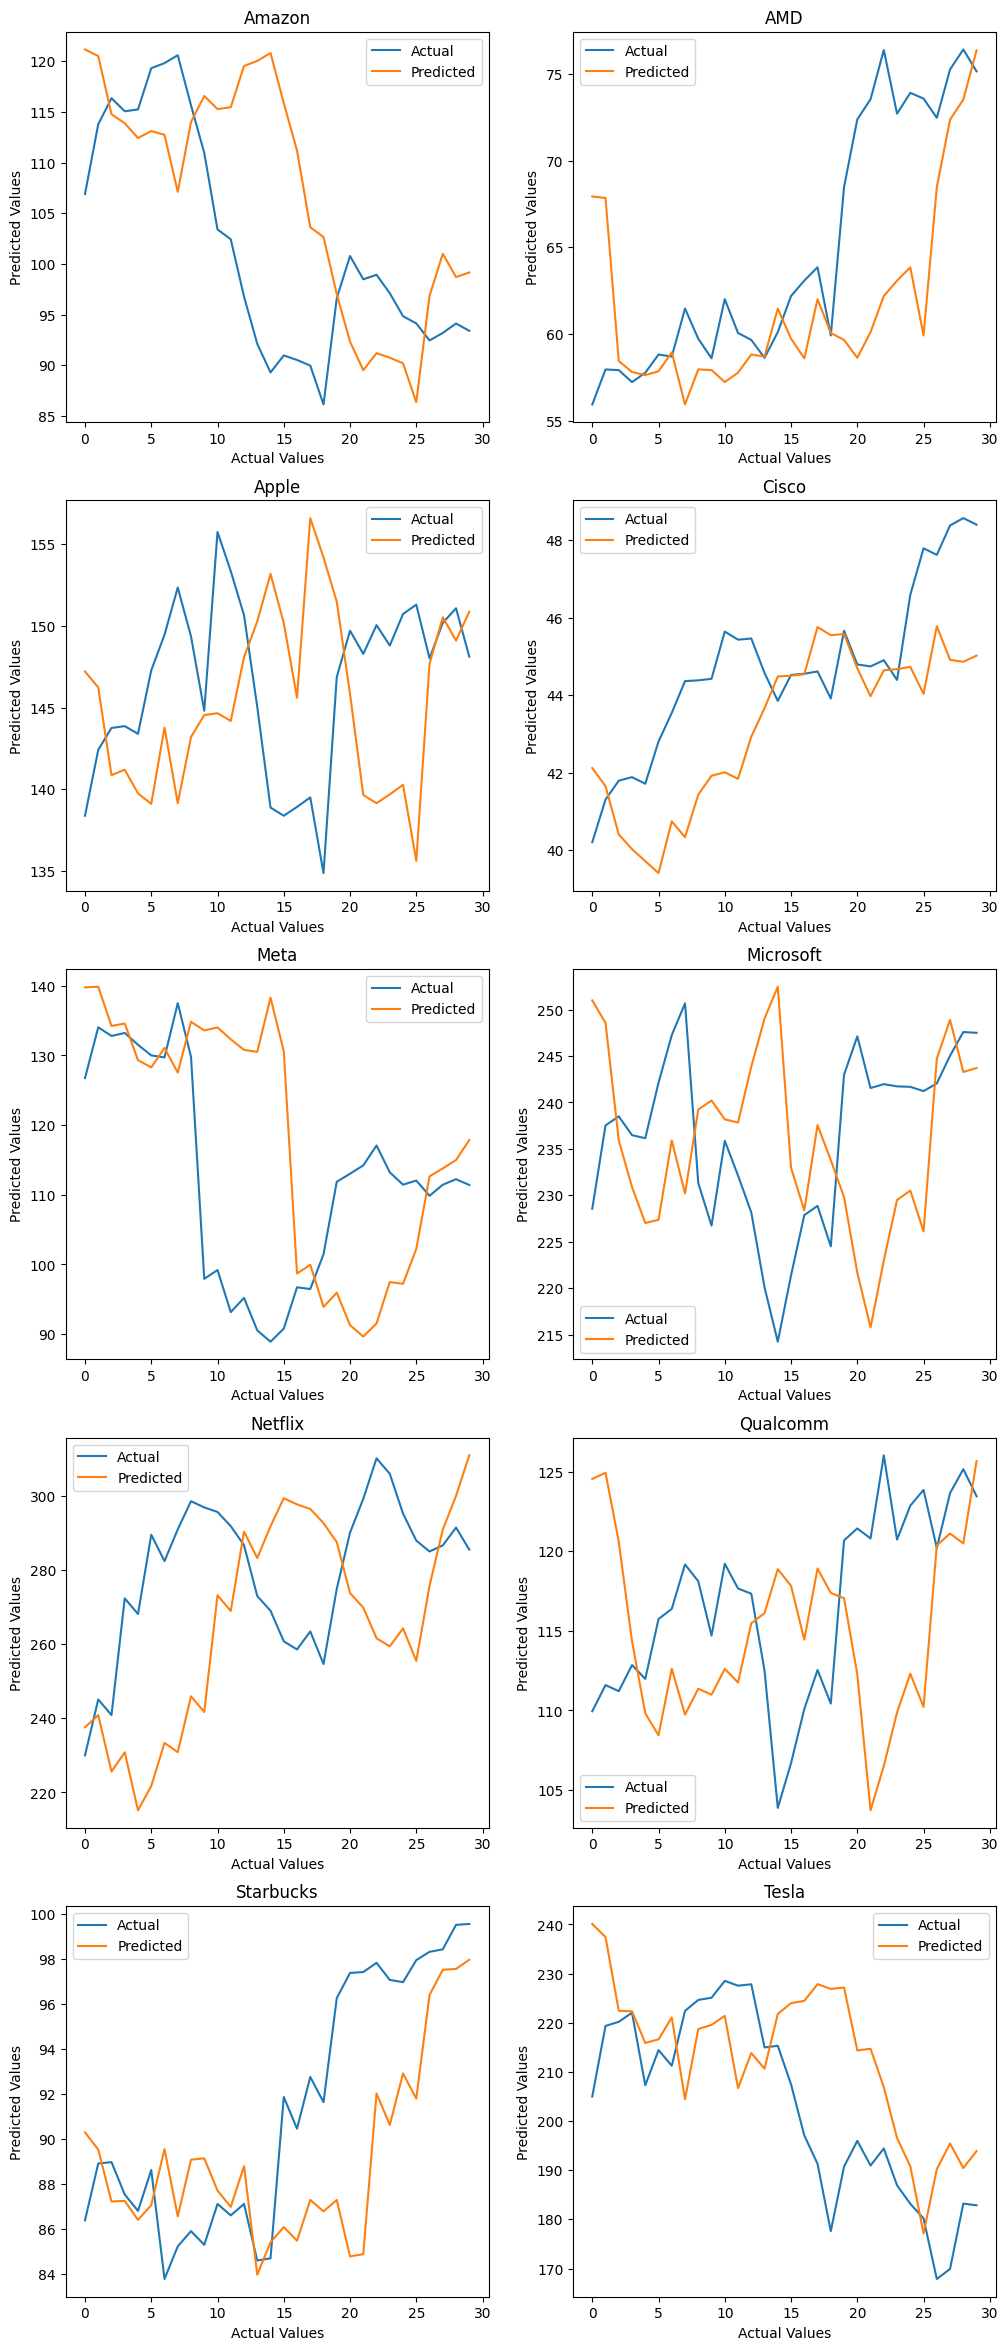

In [ ]:
def ActvsPredgraph(graphdata):
  fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 30),dpi=100)
  i=0
  for row in ax:
      for col in row:
          col.plot(graphdata[i][0].values,label="Actual")
          col.plot(graphdata[i][1],label="Predicted")
          col.legend(loc='best')
          col.set_title(Stock_data[i])
          #col.axhline(y = 0, color = 'r', linestyle = '--')
          i+=1
  for x in ax.flat:
    
    x.set(xlabel='Actual Values', ylabel='Predicted Values')
  plt.show()

ActvsPredgraph(graphdata)

# Actual vs Residual Values

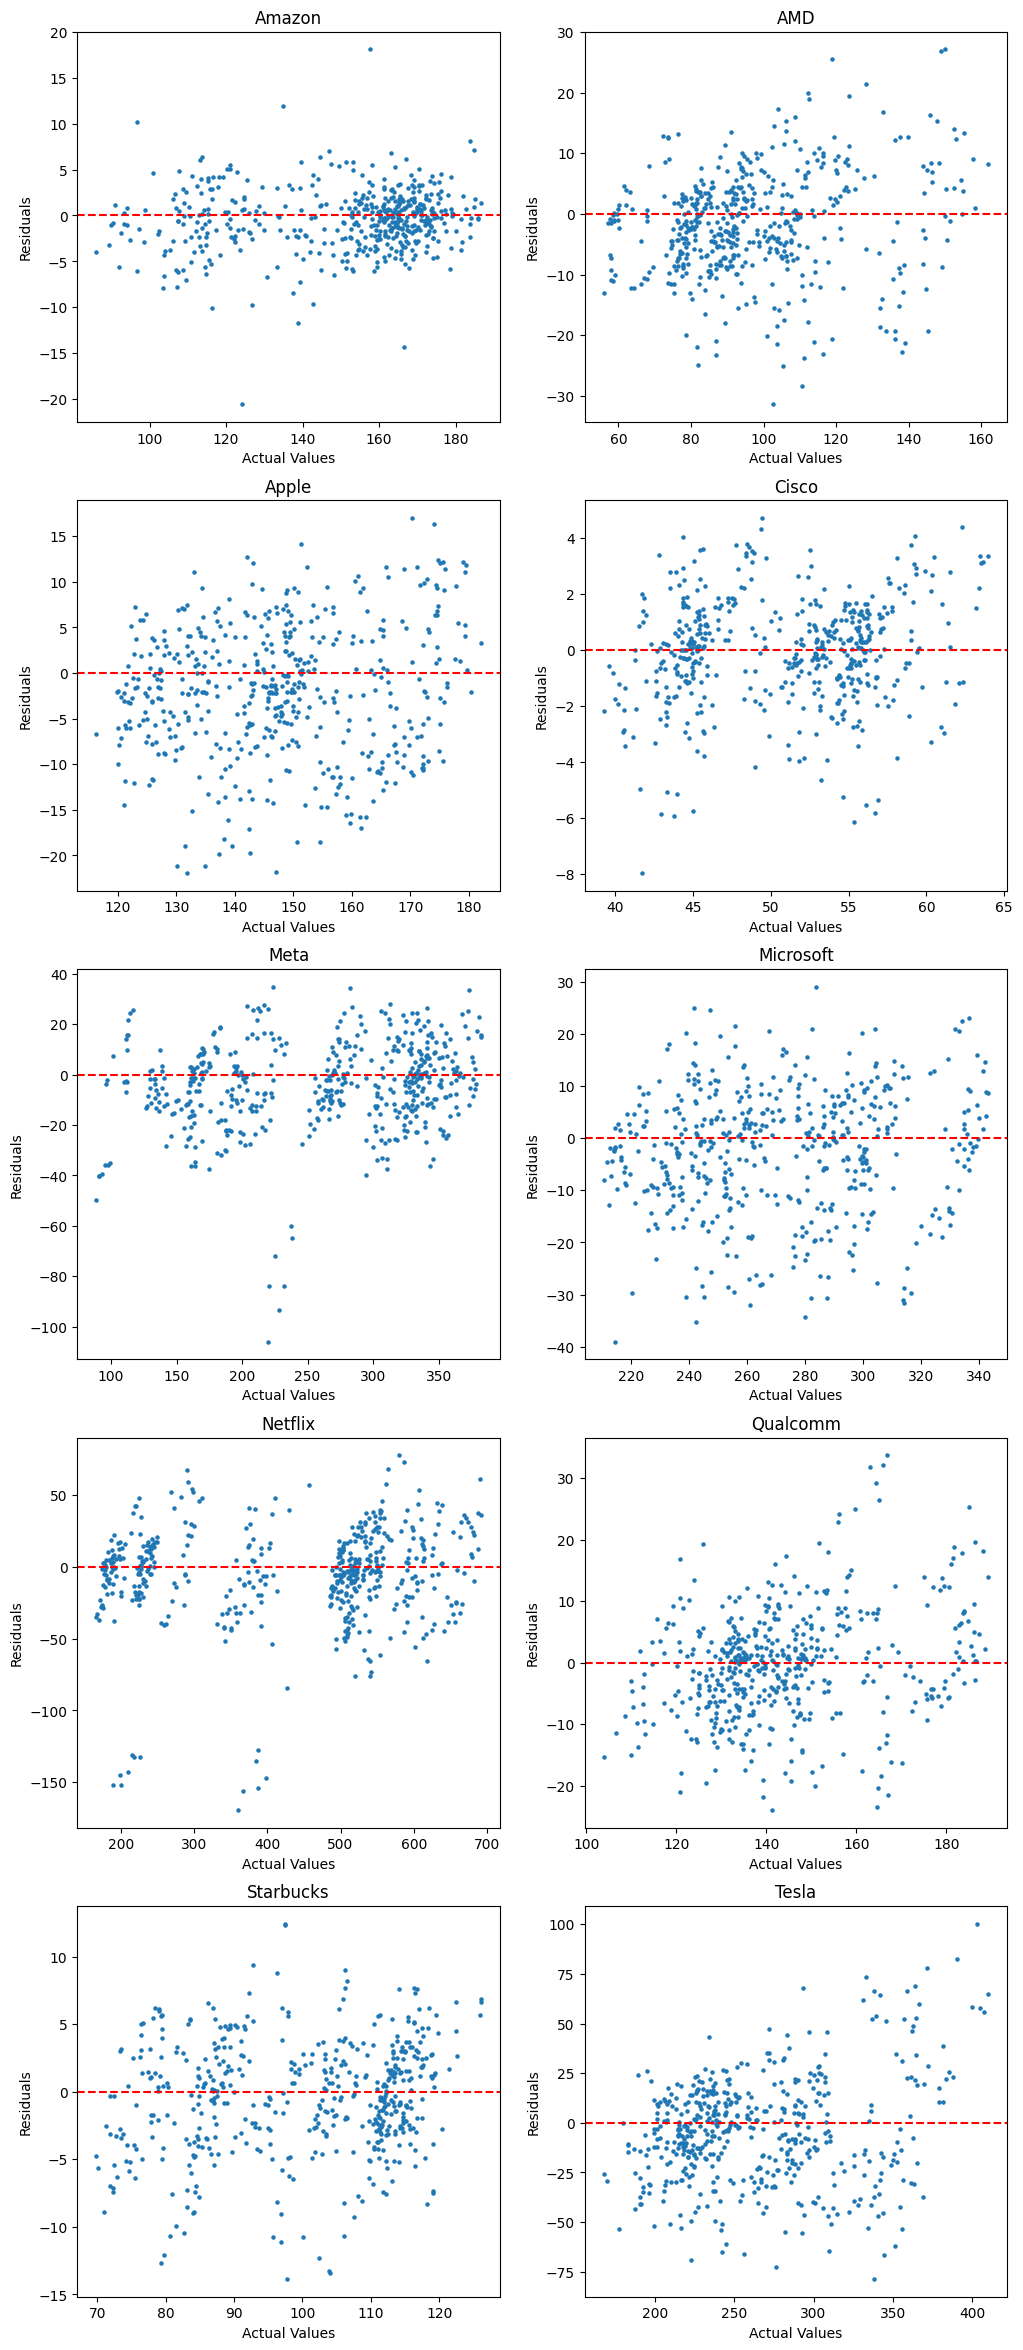

In [ ]:
def Residualplot(graphdata):
  fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 30), dpi=100)
  i=0
  for row in ax:
      for col in row:
          col.scatter(graphdata[i][0],graphdata[i][0]-graphdata[i][1],s=5)
          col.set_title(Stock_data[i])
          col.axhline(y = 0, color = 'r', linestyle = '--')
          i+=1
  for x in ax.flat:
    
    x.set(xlabel='Actual Values', ylabel='Residuals')
  plt.show()

Residualplot(graphdata)

# Actual vs predicted Values (Scatter)

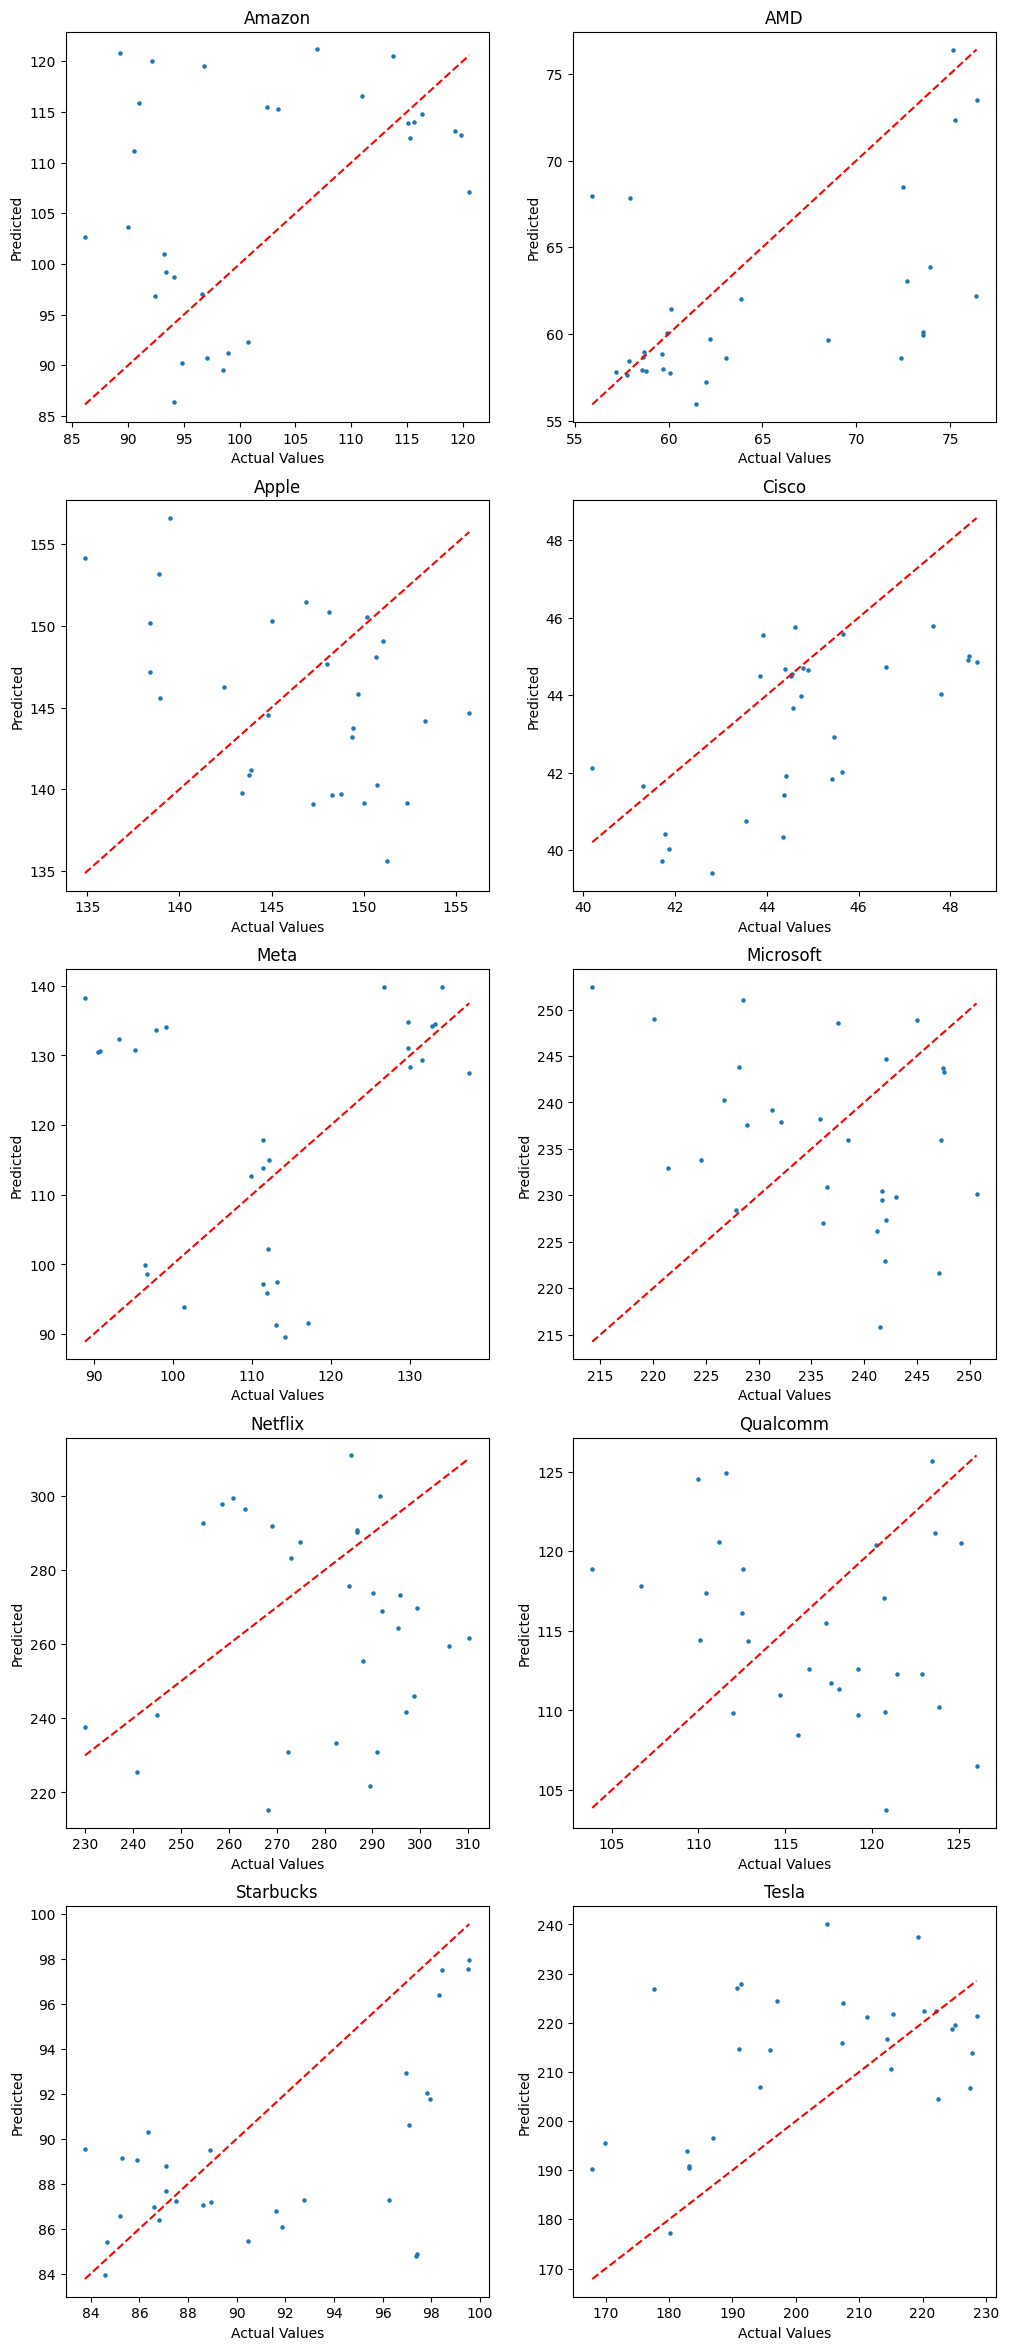

In [ ]:
def Comparisonplot(graphdata):
  fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 30), dpi=100)
  i=0
  for row in ax:
      for col in row:
          col.scatter(graphdata[i][0],graphdata[i][1],s=5)
          col.set_title(Stock_data[i])
          #col.axline((0, 0), slope=1)  
          x= np.linspace(min(graphdata[i][0]),max(graphdata[i][0]),100)
          col.plot(x, x,'--r')
          i+=1
  
  for x in ax.flat:    
    x.set(xlabel='Actual Values', ylabel='Predicted')
  plt.show()

Comparisonplot(graphdata)

# Metrics

In [ ]:
companymetrics=pd.DataFrame(metricsdata,index=Stock_data,columns=["MSE","MAE","R2 Score","One-Step Forecast"])

In [ ]:
companymetrics

,MSE,MAE,R2 Score,One-Step Forecast
Amazon,10.342230,171.356126,-0.524298,93.634674
AMD,4.833576,46.631366,0.061813,75.122035
Apple,7.370814,80.140053,-2.043974,148.920603
Cisco,1.894602,5.353249,-0.228144,48.509604
Meta,15.708168,463.791296,-1.096858,112.178676
Microsoft,12.533114,234.367941,-1.781537,249.261797
Netflix,30.069666,1239.832659,-2.305183,286.361297
Qualcomm,7.589718,82.348610,-1.555131,123.113220
Starbucks,3.693892,24.536437,0.157487,99.691707
Tesla,15.524446,384.297579,-0.130367,182.379342


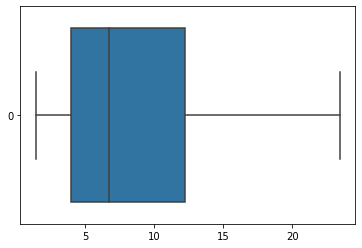

In [ ]:
sns.boxplot(data=companymetrics["MSE"],orient='h')

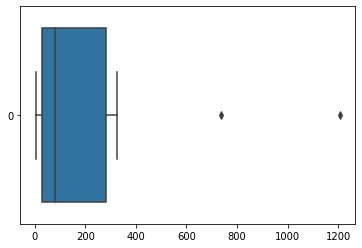

In [ ]:
sns.boxplot(data=companymetrics["MAE"],orient='h')